In [2]:
import pandas as pd
import numpy as np


np.random.seed(42)


data_normal = {
    'sales': np.random.normal(loc=500, scale=50, size=480),  
    'profit': np.random.normal(loc=100, scale=20, size=480)  
}


sales_outliers = np.random.uniform(low=1000, high=1500, size=20)
profit_outliers = np.random.uniform(low=300, high=500, size=20)


data = {
    'sales': np.concatenate([data_normal['sales'], sales_outliers]),
    'profit': np.concatenate([data_normal['profit'], profit_outliers])
}

df = pd.DataFrame(data)
print(df.shape)
df.head()


(500, 2)


,sales,profit
0,524.835708,97.441648
1,493.086785,80.889191
2,532.384427,67.871074
3,576.151493,104.069273
4,488.292331,84.872985


### IQR (Interquartile Range)

In [3]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_sales = detect_outliers_iqr(df, 'sales')
outliers_profit = detect_outliers_iqr(df, 'profit')

print("Outliers in 'sales':", outliers_sales.shape[0])
print("Outliers in 'profit':", outliers_profit.shape[0])


Outliers in 'sales': 23
Outliers in 'profit': 22


In [4]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_clean = df.copy()
df_clean = remove_outliers_iqr(df_clean, 'sales')
df_clean = remove_outliers_iqr(df_clean, 'profit')

print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


Original shape: (500, 2)
Cleaned shape: (472, 2)


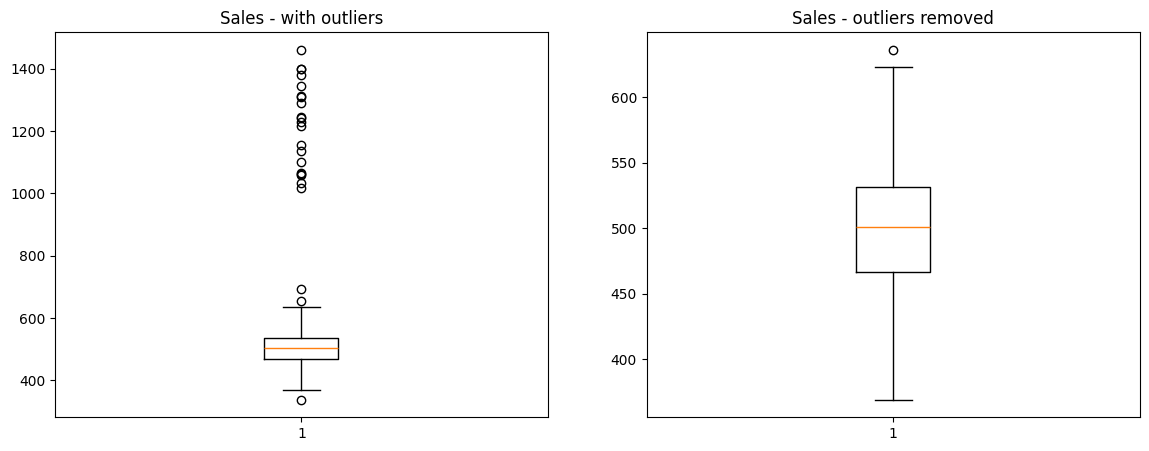

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['sales'])
plt.title('Sales - with outliers')

plt.subplot(1, 2, 2)
plt.boxplot(df_clean['sales'])
plt.title('Sales - outliers removed')

plt.show()
